In [12]:
import numpy as np
np.random.seed(2023 - 4 - 1)
import matplotlib.pyplot as plt
from random import sample
import typing
import math

# ***Support Vector Machines***
--------------------------

In [1]:
dt = """When James entered preschool, he faced significant mental and behavioral health problems, including aggressive behavior,
difficulty regulating his emotions, and trouble forming healthy relationships with peers. Despite all these difficulties,
he did not meet the diagnostic criteria for post-traumatic stress disorder (PTSD) when he was assessed by clinicians at ages 5, 9, and 16.
(More than 70% of children treated by the National Child Traumatic Stress Network [NCTSN] do not meet the criteria 
[Purbeck, C. A., et al., NCTSN Core Data Set Report, 2021].) By the time James started high school, he had been diagnosed with oppositional
defiant disorder (ODD), bipolar disorder, borderline personality disorder, and generalized anxiety disorder. He takes a cocktail of
medications, but neither his diagnoses nor his treatments address the effects of his tumultuous early years."""

In [2]:
# Consider the above text.
# We are asked to decide to which subject domain this piece of information belongs?
# Neurology / Sociology / Psychiatry / Psysiology / Developmental Psychology

# Looking at the words like mental, behavioral health, post-traumatic stress disorder (PTSD), oppositionaldefiant disorder (ODD), 
# bipolar disorder, borderline personality disorder, and generalized anxiety disorder.
# We are likely to classify this text as associated to Psychiatry / Developmental psychology

![Avatar - The Way of Water Review](./avatar2.png)

In [3]:
# Look at the above review
# The reviewer has given 10 stars and a really good and positive review.
# Note the use of following words.
# remarkable, perfect, masterpiece, amazing, phenomenal etc.

# If we see words like waste, lame, garbage, propaganda, wannabe, crap that would imply that the review is negative.
# This is a sentiment based classification task, where one classifies a document based on its word composition according to a sentiment based
# criteria.

In [4]:
# In general, a classifier can be defined as a function on the input data.
# So,

### ***$f(Medical~texts)~\rightarrow\text{{Psychiatry, Psychology, Physiology, Pathology, Rheumatology}}$***
### ***$f(Movie~reviews)~\rightarrow\text{{Positive, Negative}}$***

In [5]:
# It is typical to have numbers used to label classes e.g like -1 or +1
# And that's what SVMs or any other linear classifiers usually use.

# ***Descision Boundary***
----------------------------

In [101]:
x = range(1, 21)
y = np.random.randint(1, 50, 20)
classes = np.repeat(['o', 's'], 10)
colors = list(map(lambda _class: "red" if _class == 'o' else "blue", classes))

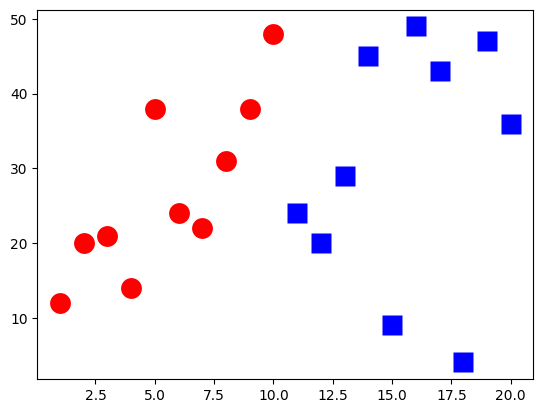

In [102]:
fig, axes = plt.subplots()
for (_x, _y, _color, _marker) in zip(x, y, colors, classes):
    axes.plot(_x, _y, marker = _marker, mfc = _color, ms = 15, linestyle = "none", mec = "none", gapcolor = "none")
plt.show()

In [103]:
# Look at the data points in this 2 dimensional space.
# Some of them are marked by blue stars while others are marked by red circles.
# Let's say that the circles are class A and the stars are class B.

# Now, we need to make a boundary to separate one class from the other class
# One can choose any decision boundary
# A circle that encircles data points of a given class
# A square
# Any other random irregular shapes

# A classification function is represented by a decision surface or decision boundary.

In [104]:
# Whenever one uses a decision boundary, the main purpose is that when you get a unlabelled data point
# You can label it using the decision boundary.
# If the unlabelled data point falls inside the boundary of class A, then label that point A.

In [124]:
y

23

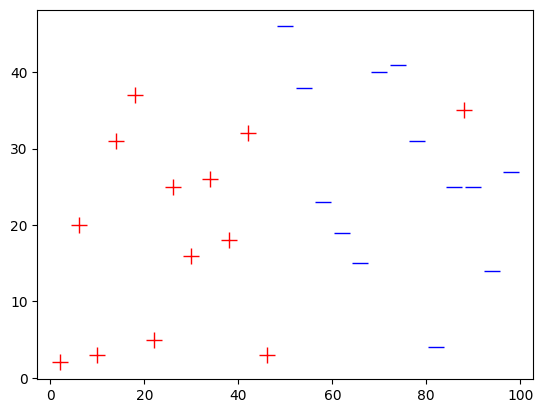

In [155]:
# There are some other factors to consider when choosing a decision boundary.

# Lets say the we have a set of positive and negative data points.

x = np.arange(2, 100, 4)
y = np.random.randint(1, 50, size = x.shape[0])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))

fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)

plt.show()

In [153]:
# ToDo
# Implemet this soon :(

# Draw a circle around the red cross at right

def circle_points(centre: typing.Tuple(float, float), radius: float, step_axisx: float) -> typing.Tuple[typing.List[float], typing.List[float]]:
    import math
    rsq: float = radius * radius
    xaxis: typing.List[float] = []
    while ((centre + step_axisx) <= radius):
        axes.apply_aspect(centre + step_axisx )
    yaxis: typing.List[float] = [math.sqrt(rsq - (x * x)) for x in xaixs]
    return (xaixs, yaxis)

In [154]:
# Looking at the above data,
# An irregular polygon can encircle all the positive data points.
# This will give a 100% accuracy on training data, since every point has been labelled correctly.
# But this might produce unpredictable results in test data, since we cannot expect the data points to be distributed similarly to 
# the training data.
# There is a good degree of clustering in the training data but one cannot expect the data points in test data to be clustered similarly.

In [156]:
# This problem happens because of the way that we defined the decision boundary.
# This problem is called data overfitting, where the decision boundaries learned from training data work very well on training data
# but fails to generalize to test data.

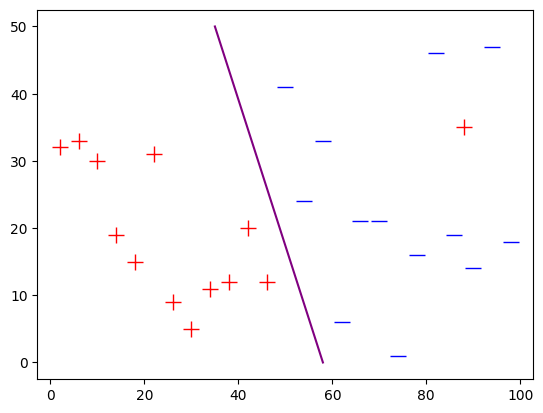

In [200]:
# Instead of irregular boundaries, consider boundaries defined by straight lines.


x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])


markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))

fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)

axes.plot([35, 58], [50, 0], color = "purple")

plt.show()

In [2]:
# The above line separates the positive data points from the nengative data points
# But it has made some mistakes.
# This line MAXIMALLY separates the positives from the negatives
# But does not classify all data points correctsly!
# It is also not possible for a single straight line to separate the positive data points from the engative data points.

# In a 2D data representation, this boundary is a line
# In a 3D data representation, this boundary will be a plane
# In an n dimensional data representation, this boundary will be a hyper plane.

In [3]:
# In general, use of simple models/classifiers to fit the data is called Occam's razor
# And simple models often generalize well.
# These models work generally well on test data.

# One should expect a few misclassifications, but the model will be a better solution overall.

### ***Finding the linear boundary***
_________________________

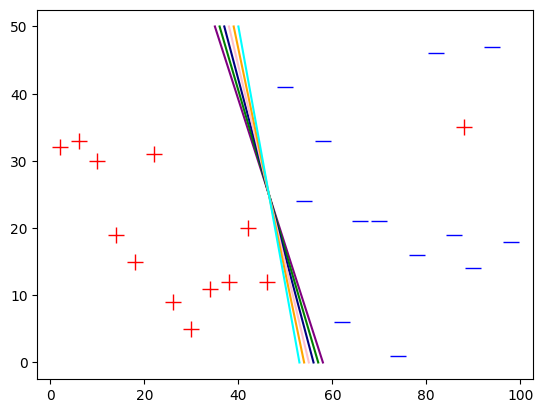

In [17]:
# A lot of algorithms are available for this.
# Finding the line implies finding the slope of the line.
# e.g. 
# Perceptron
# Linear Discriminative analyses
# Linear least squares

# A major issue with these linear boundaries is that if there's a linear boundary, there can be, by definition, infinitely many boundaries

x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([35, 58], [50, 0], color = "purple")
axes.plot([36, 57], [50, 0], color = "green")
axes.plot([37, 56], [50, 0], color = "navy")
axes.plot([38, 55], [50, 0], color = "pink")
axes.plot([39, 54], [50, 0], color = "orange")
axes.plot([40, 53], [50, 0], color = "cyan")
plt.show()

In [ ]:
# Now the choice becomes what is the best line here?

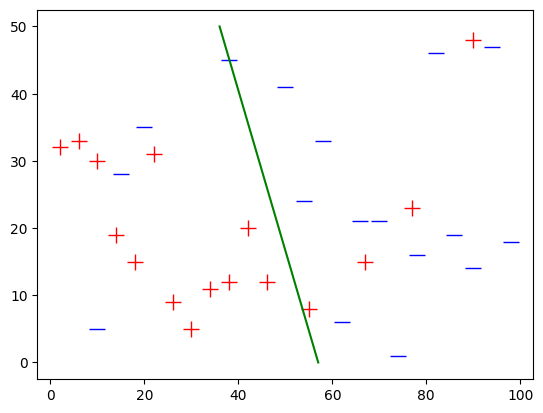

In [36]:
x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot([55, 90, 67, 77], [8, 48, 15, 23], linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([10, 15, 38, 20], [5, 28, 45, 35], linestyle = "none", marker = '_', mec = "blue", ms = 12)
axes.plot([36, 57], [50, 0], color = "green")
plt.show()

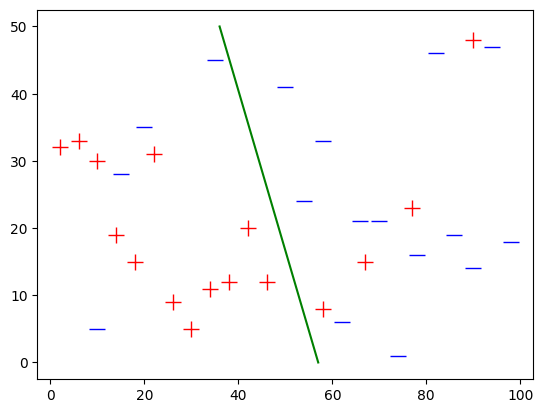

In [40]:
# Now look at the linear boundary above.
# There are two farthest points (the data points that are most confusing: that are the closest to the boundary)

# If these data points move even by a small degree, the classifier needs to adjust itself to classify them accordingly.
# Let's say that the negative point moves left and the positive point moves right
# And we keep the previous boundary  

x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot([58, 90, 67, 77], [8, 48, 15, 23], linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([10, 15, 35, 20], [5, 28, 45, 35], linestyle = "none", marker = '_', mec = "blue", ms = 12)
axes.plot([36, 57], [50, 0], color = "green")
plt.show()

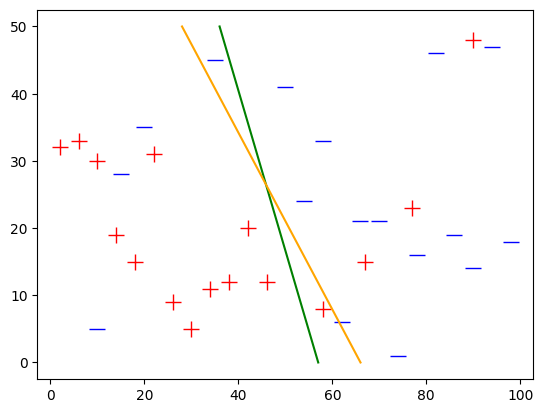

In [51]:
# Now the best fitting line needs to adjust itself to classify the moved data points accordingly.

# Now look at the linear boundary above.
# There are two farthest points (the data points that are most confusing: that are the closest to the boundary)

# If these data points move even by a small degree, the classifier needs to adjust itself to classify them accordingly.
# Let's say that the negative point moves left and the positive point moves right
# And we keep the previous boundary  

x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot([58, 90, 67, 77], [8, 48, 15, 23], linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([10, 15, 35, 20], [5, 28, 45, 35], linestyle = "none", marker = '_', mec = "blue", ms = 12)

axes.plot([36, 57], [50, 0], color = "green")   # old
axes.plot([28, 66], [50, 0], color = "orange")  # new

plt.show()

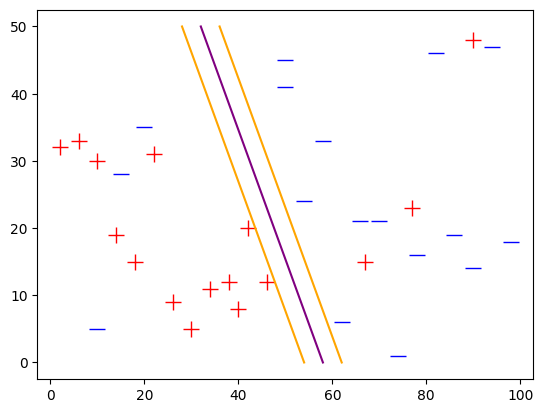

In [67]:
# But we can also use a band (two parallel lines) defining boundaries instead of a single line

x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot([40, 90, 67, 77], [8, 48, 15, 23], linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([10, 15, 50, 20], [5, 28, 45, 35], linestyle = "none", marker = '_', mec = "blue", ms = 12)

axes.plot([36, 62], [50, 0], color = "orange")
axes.plot([32, 58], [50, 0], color = "purple")
axes.plot([28, 54], [50, 0], color = "orange")

plt.show()

In [2]:
# Purple line serves as the Maximum margin hyperplane.
# And the orange lines serve as margins.

# Now, even if the points closest to the margins move inside the margins or outside the margins,
# they would be on the same side of the Maximum margin hyperplane.

# Thus this type of margins are more resisitant to noise. (small perturbances in data points).
# One should seek the thickest band that can fit the data and separate the data points satisfactorily.

# The bands are called margins
# And the middle line is called a Maximum-margin-hyperplane

# The idea here is that we are not basing the classifier on two points (that define a straight line)
# But a set of data points called support vectors.

# In general, the support vector machine is the maximum-margin classifier.
# Here one/two points cannot make a significant perturbation in the model behaviour.
# There's a lot of support to learn these margins (band)
# These support vectors (data points closest to the margins) are the points most sensitive to shift.
# But even then, small perturbations to support vectors still won't change the classification
# Because classification happens with respect to this maximum-margin hyperplane.

## ***Finding the SVMs***
_________________________

In [3]:
# SVMs use optimizations techniques.
# These are linear classifiers that find a hyper plane to separate the points into two sets of data

# Where

# ***Training data: $(x_1,~y_1),~(x_2,~y_2)~(x_3,~y_1)$***

## **Where x's are the feature representation of the data.**
## **Instance vector: $x_i~=~(x_1~+~x_2~+~x_3~....~x_n)$**

# ***$y_i\text{ is one of {-1, +1}}$***

In [ ]:
# SVM finds a liner function (weight vector), such that;

# ***$f(x_i)~=<~w \cdot x_i~>+b$***

In [70]:
# +b here is accounted for bias

# ***$\text{if}~f(x_i)~\geq~0;~y_i~=~+1~\text{else}~y_i~=~-1$***

In [4]:
# However, this SVM works only for binary classifications.
# But there are instances when the clssifier has to deal with multiple classes.
# Consider the medical text example. with classes Podiatry, Neurology & Nephrology

In [5]:
# When we use SVM in a multi-class context
# There are two options to learn the boundaries.

# Method 1
# One vs Rest
# Where the classifier is essentially a binary classifier that works on a one class vs all the other classes paradigm.
# e.g. A classifier: Nephrology vs Non-nephrology texts.
# and Neurology vs Non-neurology texts.
# and Podiatry vs Non-podiatry texts.
# Thus, this is made of three binary classifiers
# for a SVM with n classes, there have to be n number of One vs Rest binary classifiers.

In [58]:
x = np.arange(1, 101, 1)
ypod = np.random.randint(75, 140, size = 34)
yneu = np.random.randint(15, 60, size = 44)
ynep = np.random.randint(140, 175, size = 22)

podiatry = range(0, 34)
neurology = range(34, 78)
nephrology = range(78, 100)

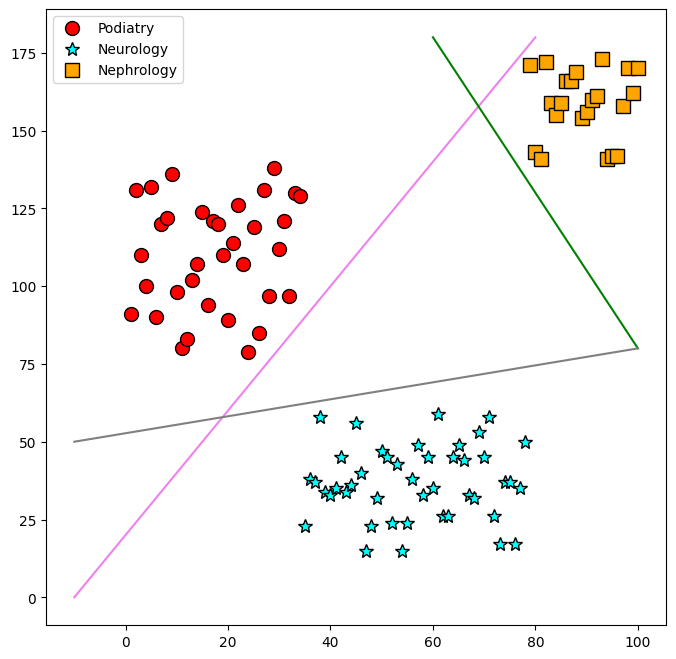

In [89]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.plot(x[podiatry], ypod, label = "Podiatry", color = "red", marker = "o", ms = 10, linestyle = "none", mec = "black")
axes.plot(x[neurology], yneu, label = "Neurology", color = "cyan", marker = "*", ms = 10, linestyle = "none", mec = "black")
axes.plot(x[nephrology], ynep, label = "Nephrology", color = "orange", marker = "s", ms = 10, linestyle = "none", mec = "black")

axes.plot([-10, 80], [0, 180], color = "violet") # Podiatry vs Non-podiatry
axes.plot([60, 100], [180, 80], color = "green") # Nephrology vs Non-nephrology
axes.plot([-10, 100], [50, 80], color = "grey") # Neurology vs Non-neurology

plt.legend()
# plt.grid()
plt.show()

In [92]:
# Method 2
# One vs One
# e.g. Nephrology vs Neurology
# Nephrology vs Podiatry
# Neurology vs Podiatry

# Here, in general, for a training data with n classes, n choose 2 number of classifiers will be used.
for i in range(1, 10):
    print(f"For {i} number of classes -> {math.comb(i, 2)} classifiers")

For 1 number of classes -> 0 classifiers
For 2 number of classes -> 1 classifiers
For 3 number of classes -> 3 classifiers
For 4 number of classes -> 6 classifiers
For 5 number of classes -> 10 classifiers
For 6 number of classes -> 15 classifiers
For 7 number of classes -> 21 classifiers
For 8 number of classes -> 28 classifiers
For 9 number of classes -> 36 classifiers


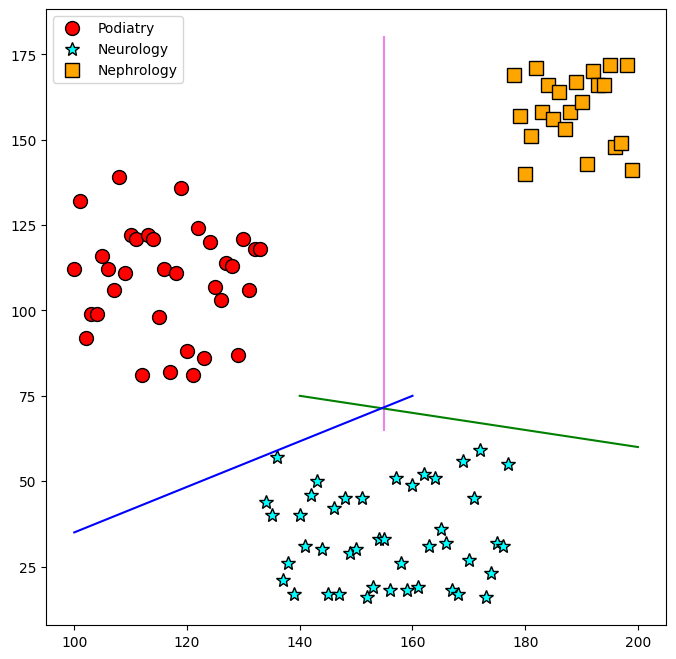

In [113]:
x = np.arange(100, 201, 1)
ypod = np.random.randint(75, 140, size = 34)
yneu = np.random.randint(15, 60, size = 44)
ynep = np.random.randint(140, 175, size = 22)

podiatry = range(0, 34)
neurology = range(34, 78)
nephrology = range(78, 100)

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.plot(x[podiatry], ypod, label = "Podiatry", color = "red", marker = "o", ms = 10, linestyle = "none", mec = "black")
axes.plot(x[neurology], yneu, label = "Neurology", color = "cyan", marker = "*", ms = 10, linestyle = "none", mec = "black")
axes.plot(x[nephrology], ynep, label = "Nephrology", color = "orange", marker = "s", ms = 10, linestyle = "none", mec = "black")

axes.plot([155, 155], [180, 65], color = "violet") # Podiatry vs Nephrology
axes.plot([140, 200], [75, 60], color = "green") # Nephrology vs Neurology
axes.plot([100, 160], [35, 75], color = "blue") # Neurology vs Podiatry

plt.legend()
plt.show()

In [114]:
# In these types of classification systems with n number of classifiers,
# each data point will get n number of votes

# Consider the blue stars (Neurology)
# They will be classified as Neurology by the Neurology vs Nephrology classifier and the Neurology vs Podiatry classifier
# So, two votes on Neurology
# Since the boundary of Podiatry vs Nephrology classifier goes right through the middle of these data points,
# It will give a set of non-homogenous results based on the location of the data point (either Podiatry or Nephrology)
# So, the third vote is variable depending on the data point's position.

# However, the third vote has a less deterministic effect since we already have two agreeing votes in favour of a label.
# So, regardless of the third vote, all these points could be classified as Neurology.

# ***SVM Parameters***

In [115]:
# Parameter C
# Parameter C decides the regularization.
# Regularization is a measure of how important that a data point is labelled correctly.
# How much importance should we give to individual data points?

# A larger C value means that the regularization is less
# That means that the training data is getting fitted as rigorously as possible
# i.e. individual data points are being given lot of importance.
# even if the overall accuracy is low (high generalization error)

# Smaller values of C means that there is more regularization.
# Classifier is more tolerant to errors in individual data points.
# Generalization error is expected to be low.

In [116]:
# Other params.
# Other params are typically with respect to what type of decision boundary you want to learn.

# Linear kernels usually work best for text data. (Linear decision boundaries)
# But one could also use polynomial kernel / radial basis function (RBF) kernel et.c.

# Binary-class or Multi-class
# If multi-class whether to use one-vs-rest (OVR) or one-vs-one (OVO)

# Class weight
# Different classes could have different weightages.
# e.g. consider a classifier classifing emails as spam or non-spam
# Assuming most of the emails most users get are spams,
# That makes the distribution skewed.
# In this case one might want to give different weights to different classes.